<a href="https://colab.research.google.com/github/pn0159/Data-Analysis-using-Python-and-Tableau/blob/main/SuicideRates_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Invoking the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Reading the path

location="C:\\Users\\pn0159\\info5502\\master.csv"
originaldata = pd.read_csv(location)

originaldata.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k',
                      'country-year', 'yearlyHDI', 'GDPpyear', 'GDPpcapita', 'generation']

originaldata.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,GDPpcapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
originaldata.isnull().sum()

country                0
year                   0
sex                    0
age                    0
suicides_no            0
population             0
suicidesper100k        0
country-year           0
yearlyHDI          19456
GDPpyear               0
GDPpcapita             0
generation             0
dtype: int64

In [ ]:
originaldata.drop(['yearlyHDI'],axis=1,inplace=True)

In [ ]:
#Here I created a separate dataframe of "age" and "suicides_no".

data_age = originaldata.groupby("age", as_index=False).suicides_no.sum()
data_age

,age,suicides_no
0,15-24 years,808542
1,25-34 years,1123912
2,35-54 years,2452141
3,5-14 years,52264
4,55-74 years,1658443
5,75+ years,653118


Text(0.5, 1.0, 'Showing the relation between Age group and Number of suicide cases')

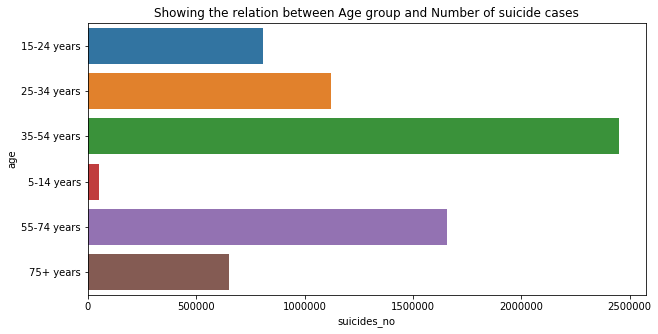

In [ ]:
#Here i plotted the above dataframe which shows me the suicide cases for different age groups. 

plt.figure(figsize=(10,5))
sns.barplot(x=data_age["suicides_no"], y=data_age["age"])
plt.title("Showing the relation between Age group and Number of suicide cases")

In [ ]:
#Firstly, we create a dataframe with the necessary features(columns) required for the operation.

data_year = originaldata.groupby("year", as_index=False).suicides_no.sum()
data_year.head()

,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

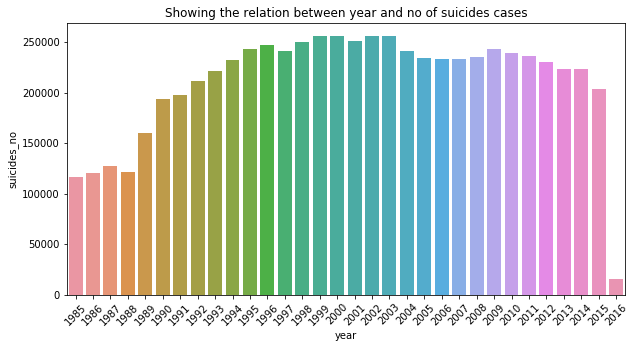

In [ ]:
# now i plotted the above dataframe.

plt.figure(figsize=(10,5))
sns.barplot(x=data_year["year"], y=data_year["suicides_no"])
plt.title("Showing the relation between year and no of suicides cases")
plt.xticks(rotation=45)

In [ ]:
# Here I cross-checked the data of 2016.
a = originaldata[originaldata['year']==2016]
a.describe

<bound method NDFrame.describe of         country  year     sex          age  suicides_no  population  \
1248    Armenia  2016    male    75+ years           12       61956   
1249    Armenia  2016    male  55-74 years           16      237813   
1250    Armenia  2016    male  35-54 years           16      350633   
1251    Armenia  2016    male  15-24 years            5      202220   
1252    Armenia  2016  female    75+ years            2      102414   
1253    Armenia  2016  female  55-74 years            6      308349   
1254    Armenia  2016    male  25-34 years            4      255665   
1255    Armenia  2016  female  35-54 years            3      408109   
1256    Armenia  2016  female  25-34 years            2      277452   
1257    Armenia  2016  female  15-24 years            1      195422   
2158    Austria  2016    male    75+ years          212      307692   
2159    Austria  2016    male  55-74 years          290      928992   
2160    Austria  2016    male  35-54 years 

In [ ]:
# Find out which gender is most likely to commit suicide
data_gender = originaldata.groupby("sex", as_index=False).suicides_no.sum()
data_gender

,sex,suicides_no
0,female,1559510
1,male,5188910


Text(0.5, 1.0, 'Relation between gender and no of suicide cases')

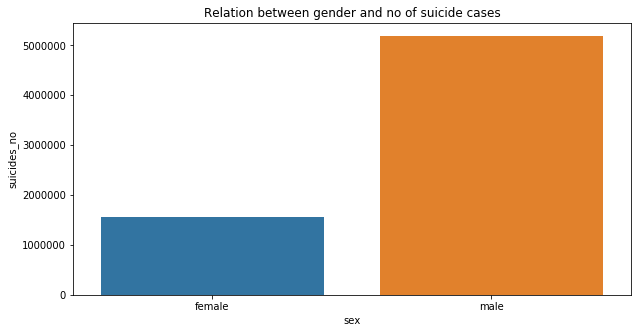

In [ ]:
# To visualize the above data i used barplot.

plt.figure(figsize=(10,5))
sns.barplot(x=data_gender["sex"], y=data_gender["suicides_no"])
plt.title("Relation between gender and no of suicide cases")

In [ ]:
#Relation between generation and number of suicide cases
# Creating a dataframe of generation and suicides_no.
data_gen = originaldata.groupby("generation", as_index=False).suicides_no.sum()
data_gen

,generation,suicides_no
0,Boomers,2284498
1,G.I. Generation,510009
2,Generation X,1532804
3,Generation Z,15906
4,Millenials,623459
5,Silent,1781744


Text(0.5, 1.0, 'No of Suicide cases in each generation.')

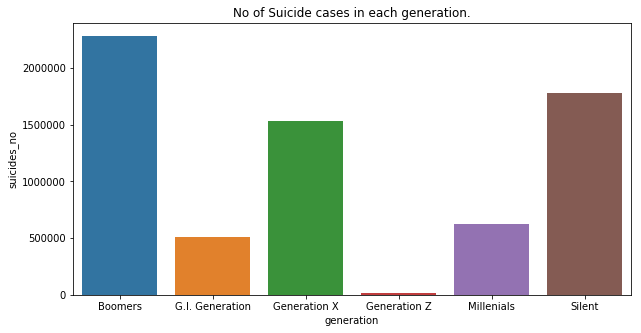

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=data_gen["generation"], y=data_gen["suicides_no"])
plt.title("No of Suicide cases in each generation.")

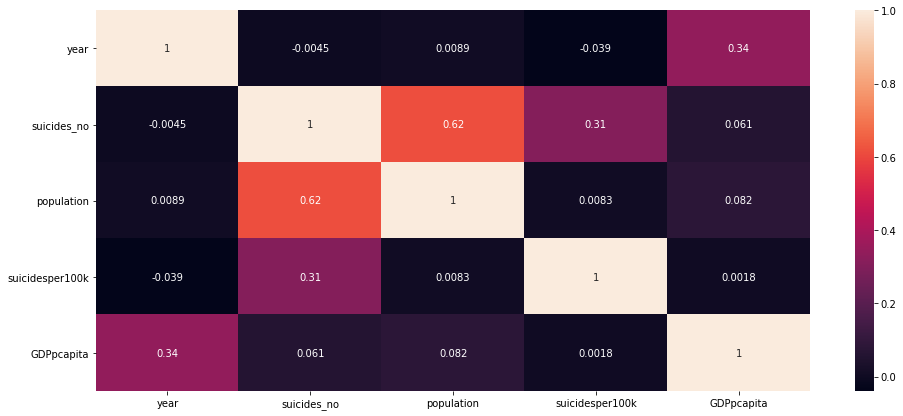

In [ ]:
plt.figure(figsize=(16,7))
cor = sns.heatmap(originaldata.corr(), annot = True)

In [ ]:
f,ax=plt.subplots(2,figsize=(18,8))
originaldata['generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Generations Count')
plt.show()

In [ ]:
#fixing and cleaning the original data  
originaldata['GDPpyear'] = originaldata.apply(lambda x: float(x['GDPpyear'].replace(',', '')), axis=1)
originaldata.sex.astype('category')

In [ ]:
location1="C:\\Users\\pn0159\\info5502\\suicidedataextrafestures.csv"
extra_data = pd.read_csv(location1)

extra_data.columns = [
    'country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k', 'country-year', 'yearlyHDI',
    'GDPpyear', 'GDPpcapita', 'generation', 'suicide%', 'Internetusers', 'Expenses', 'employeecompensation',
    'Unemployment', 'Physiciansp1000', 'Legalrights', 'Laborforcetotal', 'Lifeexpectancy', 'Mobilesubscriptionsp100',
    'Refugees', 'Selfemployed', 'electricityacess', 'secondarycompletion']

In [ ]:
extra_data.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,Unemployment,Physiciansp1000,Legalrights,Laborforcetotal,Lifeexpectancy,Mobilesubscriptionsp100,Refugees,Selfemployed,electricityacess,secondarycompletion
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
countrynames = [
    'Argentina',
    'Armenia',
    'Australia',
    'Austria',
    'Belgium',
    'Brazil',
    'Bulgaria',
    'Canada',
    'Chile',
    'Colombia',
    'Croatia',
    'Cuba',
    'Czech Republic',
    'Denmark',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Ireland',
    'Israel',
    'Italy',
    'Japan',
    'Mexico',
    'Netherlands',
    'New Zealand',
    'Norway',
    'Poland',
    'Portugal',
    'Romania',
    'Russian Federation',
    'South Africa',
    'Spain',
    'Sweden',
    'Switzerland',
    'Thailand', 
    'Turkmenistan',
    'Ukraine',
    'United Kingdom', 
    'United States']

In [ ]:
df1 = extra_data.copy()
df = df1.iloc[np.where(df1.country == countrynames[0])]
for i, x in enumerate(countrynames[1:]):
    df = df.append(df1.iloc[np.where(df1.country == x)])

df = df[df.year >= 1995]
df = df[df.year <= 2013]

Text(0.5, 1.0, 'Suicides/100K for both gender interms of age group')

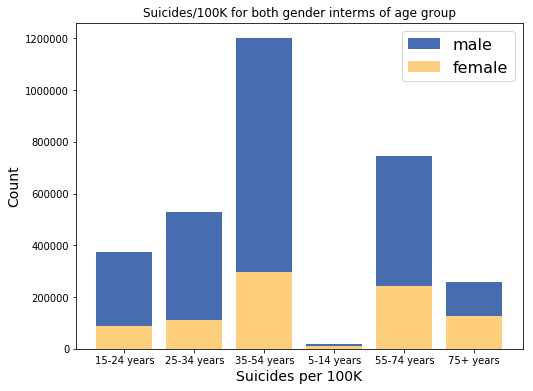

In [ ]:
#Exploratory Data Analysis

col = plt.cm.Spectral(np.linspace(0, 1, 20))

plt.figure(figsize=(8, 6))

agedistf = pd.DataFrame(df.groupby('sex').get_group('female').groupby('age').suicides_no.sum())

agedistm = pd.DataFrame(df.groupby('sex').get_group('male').groupby('age').suicides_no.sum())

plt.bar(agedistm.index, agedistm.suicides_no, color=col[18])
plt.bar(agedistf.index, agedistf.suicides_no, color=col[7])
plt.legend(['male', 'female'], fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Suicides per 100K', fontsize=14)
plt.title('Suicides/100K for both gender interms of age group')

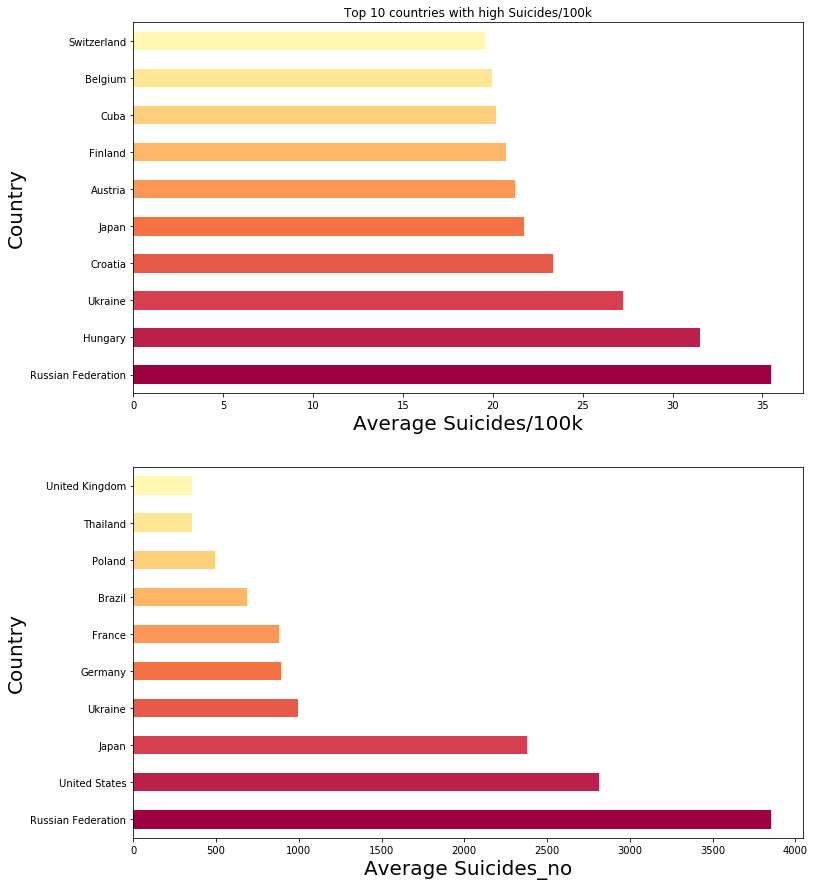

In [ ]:
plt.figure(figsize=(12, 15))


plt.subplot(211)
df.groupby(['country']).suicidesper100k.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries with high Suicides/100k')

plt.subplot(212)
df.groupby(['country']).suicides_no.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);

Text(0.5, 1.0, 'Suicide cases for both gender for different age groups')

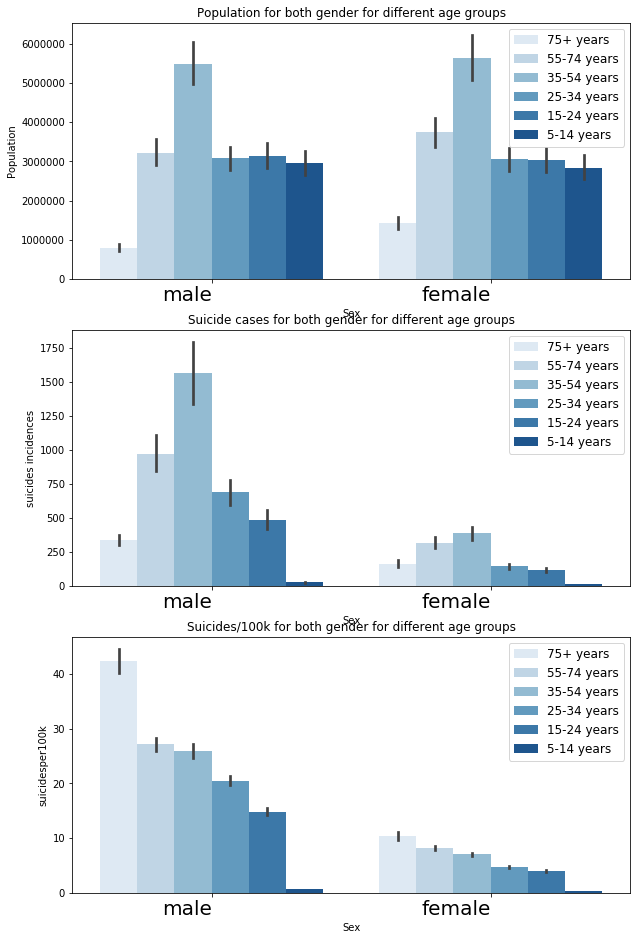

In [ ]:
plt.figure(figsize=(10, 16))

plt.subplot(311)

sns.barplot(x='sex', y='population', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('Population')
plt.xlabel('Sex')
plt.legend(fontsize=12, loc='best')
plt.title('Population for both gender for different age groups')

plt.subplot(313)

sns.barplot(x='sex', y='suicidesper100k', hue='age', data=df,palette="Blues")
plt.xticks(ha='right', fontsize=20);
plt.ylabel('suicidesper100k');
plt.xlabel('Sex');
plt.legend(fontsize=12);
plt.title('Suicides/100k for both gender for different age groups')

plt.subplot(312)
sns.barplot(x='sex', y='suicides_no', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides incidences')
plt.xlabel('Sex')
plt.legend(fontsize=12)
plt.title('Suicide cases for both gender for different age groups')

Text(0.5, 1.0, 'Year wise suicide trend')

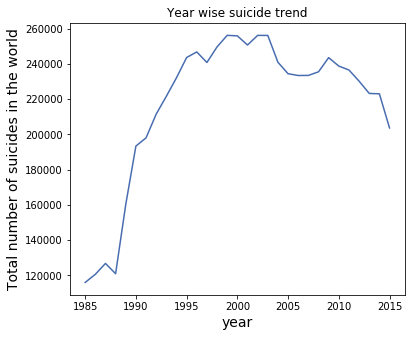

In [ ]:
year = originaldata.groupby('year').year.unique()

plt.figure(figsize=(6, 5))

totalpyear = pd.DataFrame(originaldata.groupby('year').suicides_no.sum())

plt.plot(year.index[0:31], totalpyear[0:31], color=col[18])
plt.xlabel('year', fontsize=14)
plt.ylabel('Total number of suicides in the world', fontsize=14)
plt.title('Year wise suicide trend')

Text(0.5, 1.0, 'Trend interms of GDP per Capita')

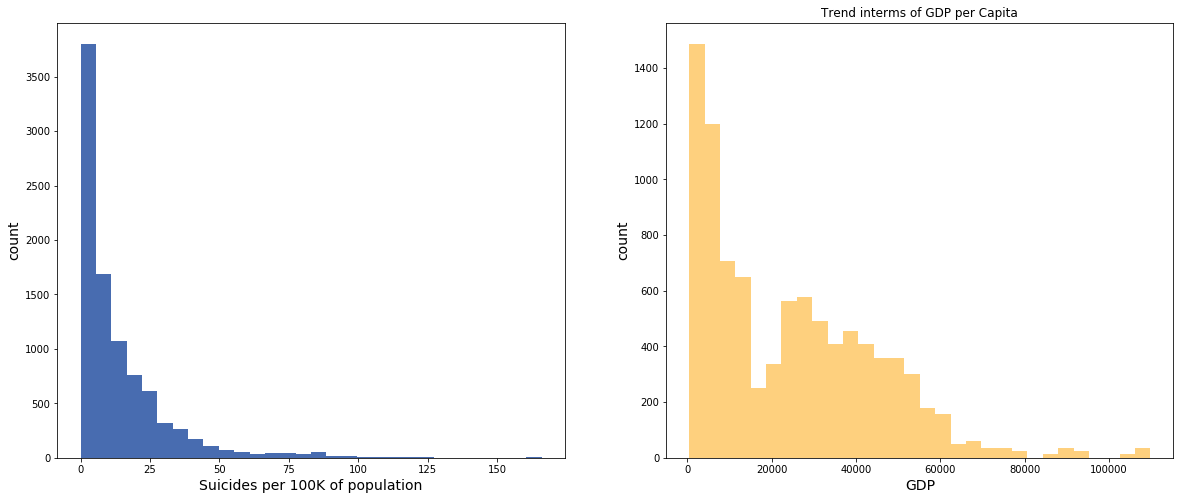

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.hist(df.suicidesper100k, bins=30, color=col[18])
plt.xlabel('Suicides per 100K of population', fontsize=14)
plt.ylabel('count', fontsize=14)

plt.subplot(122)
plt.hist(df.GDPpcapita, bins=30, color=col[7])
plt.xlabel('GDP', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title('Trend interms of GDP per Capita')

In [ ]:
features = ['country', 'year', 'GDPpyear', 'GDPpcapita', 'employeecompensation', 'Unemployment',
            'Lifeexpectancy', 'Refugees', 'Selfemployed', 'Internetusers']

total = df[features].groupby('country').get_group(countrynames[0]).groupby('year').mean()
total['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('country').get_group(countrynames[0]).groupby('year').sum()
total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(countrynames[0]).groupby('year').sum()

total['country'] = countrynames[0]

for i, x in enumerate(countrynames[1:]):
    suicides = df[features].groupby('country').get_group(x).groupby('year').mean()
    suicides['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('country').get_group(x).groupby('year').sum()
    total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(x).groupby('year').sum()
  
    suicides['country'] = x
    total = total.append(suicides)

total.reset_index(inplace=True)
sort = True

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [ ]:
totalfeatures = ['country', 'year', 'GDPpyear', 'GDPpcapita', 'employeecompensation', 'Unemployment',
                 'Lifeexpectancy', 'Refugees', 'Selfemployed', 'Internetusers', 'population']

Text(0.5, 0, 'GDP')

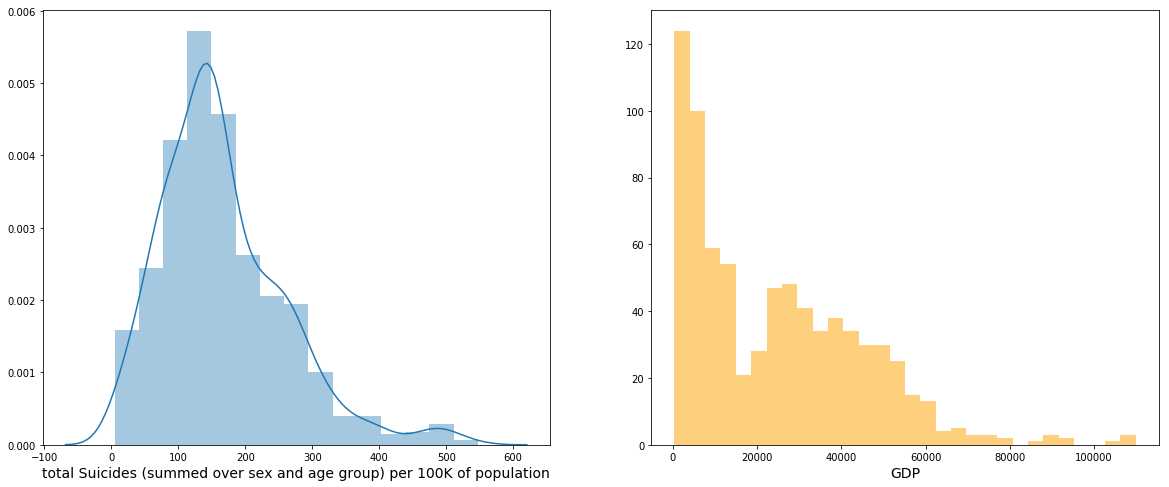

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.distplot(total.Suicides, bins=15)
plt.xlabel('total Suicides (summed over sex and age group) per 100K of population', fontsize=14)

plt.subplot(122)
plt.hist(total.GDPpcapita, bins=30, color=col[7])
plt.xlabel('GDP', fontsize=14)

Text(0.5, 1.0, 'Summary trend for average GDP Unemployment suicides and life expectancy')

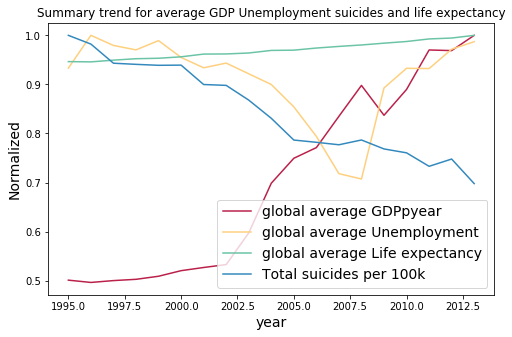

In [ ]:
plt.figure(figsize=(8, 5))

suicides = df[['year', 'GDPpyear', 'Selfemployed', 'Unemployment', 'Lifeexpectancy']].groupby('year').mean()
suicides['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('year').sum()

plt.plot(suicides.index, suicides.GDPpyear/suicides.GDPpyear.max(), color=col[1])
plt.plot(suicides.index, suicides.Unemployment/suicides.Unemployment.max(), color=col[7])
plt.plot(suicides.index, suicides.Lifeexpectancy/suicides.Lifeexpectancy.max(), color=col[15])
plt.plot(suicides.index, suicides.Suicides/suicides.Suicides.max(), color=col[17])
plt.legend(['global average GDPpyear', 'global average Unemployment', 'global average Life expectancy', 'Total suicides per 100k'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.title('Summary trend for average GDP Unemployment suicides and life expectancy')

Text(0.5, 1.0, 'Correlation Summary')

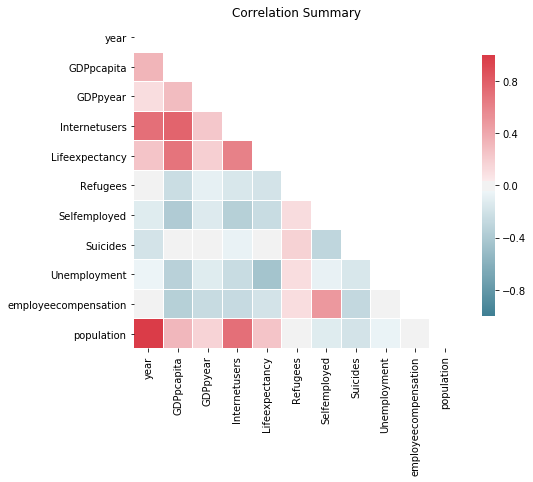

In [ ]:
#Correlations
#Calculating the correlation matrix for all chosen features:
corr = total.corr()

# Generate a mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.2, cbar_kws={"shrink": 0.8});
plt.title('Correlation Summary')

In [ ]:
#Data preprocessing
#Cleaning the data, replacing null values with appropriate replacements

# Cleaning the data, replacing null values with appropriate replacements

total.Internetusers.fillna(total.Internetusers. min(), inplace=True)
total.Refugees.fillna(8, inplace=True)
total.employeecompensation.fillna(total.employeecompensation.mean(), inplace=True)
total.population.fillna(total.population.mean(), inplace=True)

In [ ]:
#Binary classification for suicide risk

total['risk'] = total.Suicides.copy()

total['risk'] = np.where(total.risk < total.Suicides.mean(), 0, 1)

Text(0.5, 0, 'Suicides')

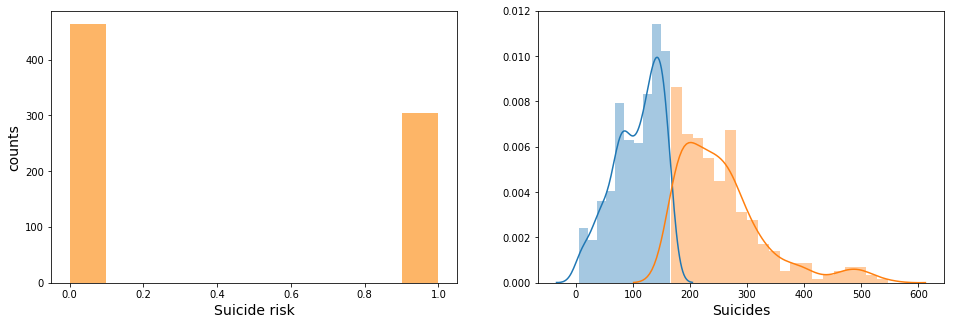

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.hist(total.risk, color=col[6])
plt.ylabel('counts', fontsize=14)
plt.xlabel('Suicide risk', fontsize=14)

plt.subplot(122)
sns.distplot(total.Suicides[total.risk == 0], bins=10)
sns.distplot(total.Suicides[total.risk == 1], bins=20)  
plt.xlabel('Suicides', fontsize=14)

In [ ]:
# Label encoding countries

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

total.country = le.fit_transform(total.country)  # Alphabetic order [0:40]
total.country.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40], dtype=int64)

In [ ]:
# Preparing data for modeling

X = np.asarray(total[totalfeatures])
y = np.asarray(total['risk'])


# Applying standard scaler on data, since ML algorithms work with the assumption that the data is normally distributed

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (576, 11) (576,)
Test set: (192, 11) (192,)


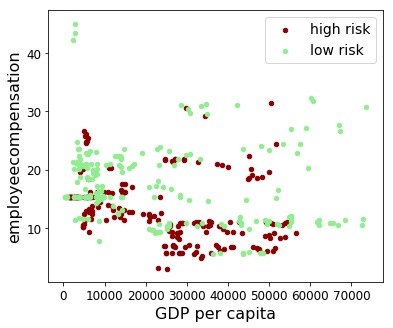

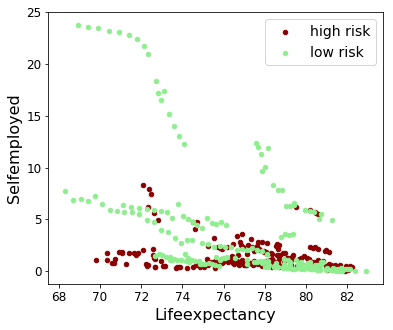

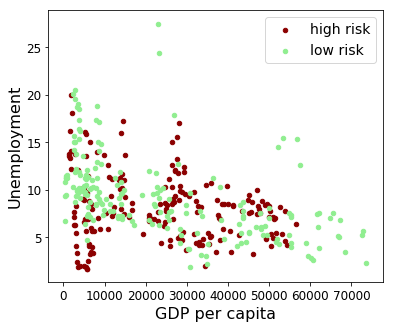

In [ ]:
ax1 = total[total['risk'] == 1][0:200].plot(kind='scatter', x='GDPpcapita', y='employeecompensation', color='DarkRed',
                                            label='high risk', figsize=(6, 5), fontsize=12)
total[total['risk'] == 0][0:200].plot(kind='scatter', x='GDPpcapita', y='employeecompensation', color='LightGreen',
                                      label='low risk', ax=ax1)

plt.ylabel('employeecompensation', fontsize=16)
plt.xlabel('GDP per capita', fontsize=16)
plt.legend(fontsize=14)


ax1 = total[total['risk'] == 1][0:200].plot(kind='scatter', x='Lifeexpectancy', y='Selfemployed', color='DarkRed',
                                            label='high risk', figsize=(6, 5), fontsize=12)
total[total['risk'] == 0][0:200].plot(kind='scatter', x='Lifeexpectancy', y='Selfemployed', color='LightGreen',
                                      label='low risk', ax=ax1);

plt.ylabel('Selfemployed', fontsize=16)
plt.xlabel('Lifeexpectancy', fontsize=16)
plt.legend(fontsize=14)


ax1 = total[total['risk'] == 1][0:200].plot(kind='scatter', x='GDPpcapita', y='Unemployment', color='DarkRed',
                                            label='high risk', figsize=(6, 5), fontsize=12);
total[total['risk'] == 0][0:200].plot(kind='scatter', x='GDPpcapita', y='Unemployment', color='LightGreen',
                                     label='low risk', ax=ax1);

plt.ylabel('Unemployment', fontsize=16)
plt.xlabel('GDP per capita', fontsize=16);
plt.legend(fontsize=14);

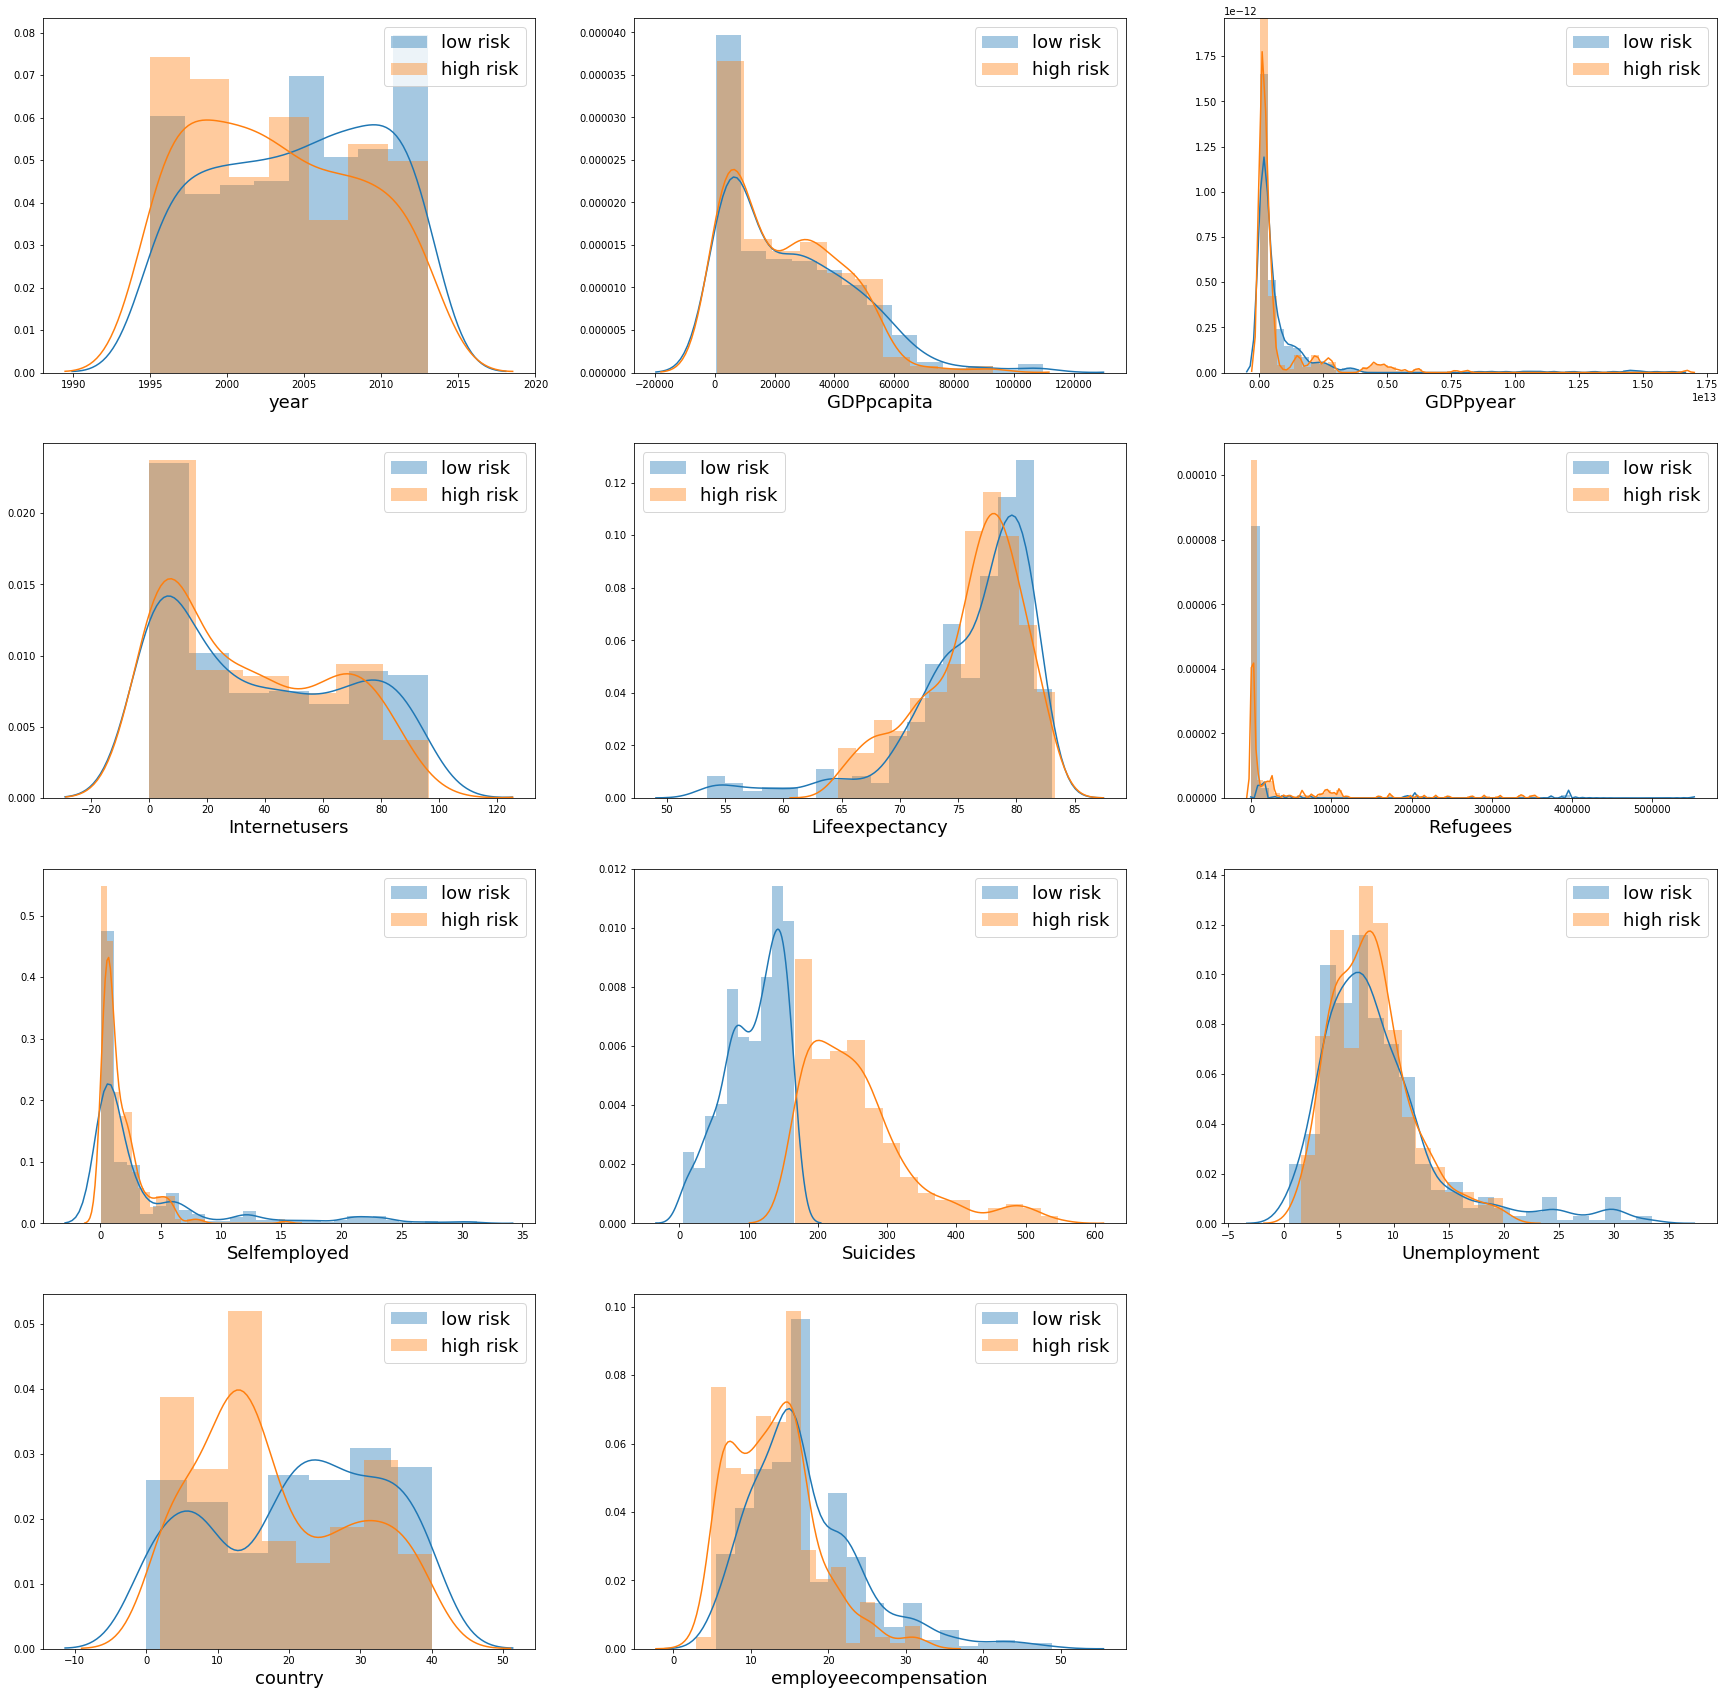

In [ ]:
fig = plt.figure(figsize=(30, 30))

j = 0
for i, x in enumerate(total.columns[0:11]):
    plt.subplot(4, 3, j+1)
    j += 1
    sns.distplot(total[x][total.risk == 0], label='low risk')
    sns.distplot(total[x][total.risk == 1], label='high risk')       
    plt.legend(loc='best', fontsize=18)  
    plt.xlabel(x, fontsize=18)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report


LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train, y_train)

yLRhat = LR.predict(X_test)

yLRhat_prob = LR.predict_proba(X_test)


print('precision_recall_fscore_support', precision_recall_fscore_support(y_test, yLRhat, average='weighted'))

cm = confusion_matrix(y_test, yLRhat)
print('\n confusion matrix \n', cm)

print('classification report for Logistic Regression\n', classification_report(y_test, yLRhat))

precision_recall_fscore_support (0.7241902834008097, 0.71875, 0.7207692307692307, None)

 confusion matrix 
 [[90 30]
 [24 48]]
classification report for Logistic Regression
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       120
           1       0.62      0.67      0.64        72

   micro avg       0.72      0.72      0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.72      0.72      0.72       192



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


DT = DecisionTreeClassifier(criterion="entropy", max_depth=7, max_leaf_nodes=30)
DT = DT.fit(X_train, y_train)
ydthat = DT.predict(X_test)

print('******************Decision Tree classifier**************')

print('Accuracy =', DT.score(X_test, y_test))
print('Train Accuracy=', DT.score(X_train, y_train))
print('CM\n', confusion_matrix(y_test, ydthat))
print('classification report for decision tree\n', classification_report(y_test, ydthat))
#print('# of leaves', DT.get_n_leaves(), '\n Depth', DT.get_depth())


DTfeat_importance = DT.feature_importances_
DTfeat_importance = pd.DataFrame([totalfeatures, DT.feature_importances_]).T


print(DTfeat_importance.sort_values(by=1, ascending=False))
print('\n# of features= ', DT.n_features_)

******************Decision Tree classifier**************
Accuracy = 0.9114583333333334
Train Accuracy= 0.9635416666666666
CM
 [[111   9]
 [  8  64]]
classification report for decision tree
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       120
           1       0.88      0.89      0.88        72

   micro avg       0.91      0.91      0.91       192
   macro avg       0.90      0.91      0.91       192
weighted avg       0.91      0.91      0.91       192

                       0          1
8           Selfemployed   0.223368
4   employeecompensation   0.187988
7               Refugees   0.172577
2               GDPpyear   0.171601
0                country   0.159688
6         Lifeexpectancy  0.0569556
5           Unemployment  0.0162485
1                   year  0.0115744
3             GDPpcapita          0
9          Internetusers          0
10            population          0

# of features=  11


In [ ]:
#Model performance optimization
#shown for the decision tree classifier only.
# USing Area under curve of ROC curve as the metric. This shows how much our classification is better than just
# randomly chosen classes

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ydthat)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9069444444444444

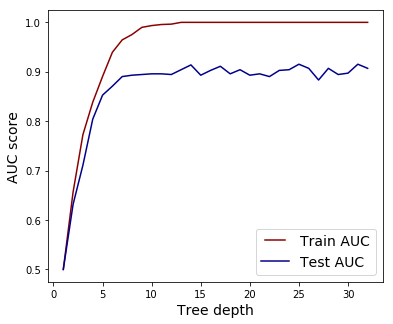

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths: 
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
plt.figure(figsize=(6, 5))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'DarkRed', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'DarkBlue', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, fontsize=14)
plt.ylabel('AUC score', fontsize=14)
plt.xlabel('Tree depth', fontsize=14)
plt.show()


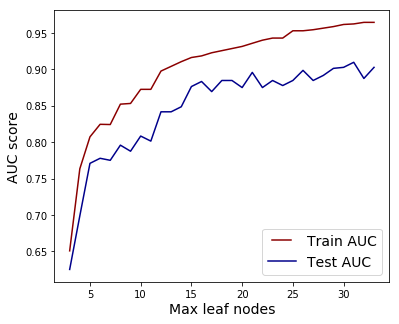

In [ ]:
max_leaf_nodes = np.linspace(3, 33, 31, endpoint=True).astype(int)
train_results = []
test_results = []

for max_leaf_nodes in max_leaf_nodes: 
    dt2 = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, max_depth=7)
    dt2.fit(X_train, y_train)
    train_pred = dt2.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    # Add auc score to previous train results
    train_results.append(roc_auc)

    y_pred = dt2.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
plt.figure(figsize=(6, 5))
    
line1, = plt.plot(np.linspace(3, 33, 31, endpoint=True), train_results, 'DarkRed', label='Train AUC')
line2, = plt.plot(np.linspace(3, 33, 31, endpoint=True), test_results, 'DarkBlue', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, fontsize=14)
plt.ylabel('AUC score', fontsize=14)
plt.xlabel('Max leaf nodes', fontsize=14)
plt.show()


In [ ]:

import scikitplot as skplt
models = [LR, DT]
modelnames = [ 'Decison tree']


for i, x in enumerate(models):
    
    y_true = y_test
    y_probas = x.predict_proba(X_test)
    ax1 = skplt.metrics.plot_roc(y_true, y_probas, plot_micro=False, plot_macro=True, classes_to_plot=[], figsize=(5, 5))
    plt.axis((-0.01, 1, 0, 1.1))
    plt.legend([modelnames[i]], loc='best')

ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#rfscores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')



dtscores = cross_val_score(DT, X_train, y_train, cv=5, scoring='accuracy')
DTpredictions = cross_val_predict(DT, X_train, y_train)

print('CM for Decision tree with cross validation\n', confusion_matrix(y_train, DTpredictions))
print('classification report for Decision tree with CV \n', classification_report(y_train, DTpredictions))

#nnscores = cross_val_score(NN, X_train, y_train, cv=5, scoring='accuracy')
#NNpredictions = cross_val_predict(NN, X_train, y_train)

#print('CM for MLP classifier  with cross validation\n', confusion_matrix(y_train, NNpredictions))
#print('classification report for MLP classifier with CV \n', classification_report(y_train, NNpredictions))

CM for Decision tree with cross validation
 [[307  37]
 [ 28 204]]
classification report for Decision tree with CV 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       344
           1       0.85      0.88      0.86       232

   micro avg       0.89      0.89      0.89       576
   macro avg       0.88      0.89      0.88       576
weighted avg       0.89      0.89      0.89       576



C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
print('Feature importance results for the Decision Tree regression model')
print('Decison Tree accuracy score (5-fold cross validation)=', dtscores.mean(), '+/-', dtscores.std()*2)
#plt.figure(figsize=(23, 4))
#plt.bar(DTfeat_importance[0], DTfeat_importance[1], color=col[14], width=0.4)
#plt.legend(['Desicion Tree cassifier acc = % f'% dtscores.mean()], fontsize=14)
#plt.xticks(ha='right', rotation=30, fontsize=15)

Feature importance results for the Decision Tree regression model
Decison Tree accuracy score (5-fold cross validation)= 0.8817646439937926 +/- 0.07426398696253678


In [ ]:
print('Feature importance results for the three best models')

Feature importance results for the three best models


In [ ]:
# select columns from the dataset and prepare a new datasets 
col = ['year', 'population',
       'suicidesper100k',
        'GDPpcapita']
df1 = originaldata[col]
print(df1.head())
y = originaldata['suicides_no']
print(y.head())

   year  population  suicidesper100k  GDPpcapita
0  1987      312900             6.71         796
1  1987      308000             5.19         796
2  1987      289700             4.83         796
3  1987       21800             4.59         796
4  1987      274300             3.28         796
0    21
1    16
2    14
3     1
4     9
Name: suicides_no, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
# devide the dataset into the 
train_x, test_x, train_y, test_y = train_test_split(df1,y, test_size = 0.2)
print(train_x.shape, train_y.shape)
print(test_y.shape, test_x.shape)
print(train_x.head())

(22256, 4) (22256,)
(5564,) (5564, 4)
       year  population  suicidesper100k  GDPpcapita
10822  1995     1435874             0.28        1696
19354  2015     1953588             0.61       13228
10496  1995        9818             0.00        3869
6959   2005       57341             1.74       26671
13317  2006      205376             0.00        4738


In [ ]:
train_x.head()

,year,population,suicidesper100k,GDPpcapita
10822,1995,1435874,0.28,1696
19354,2015,1953588,0.61,13228
10496,1995,9818,0.00,3869
6959,2005,57341,1.74,26671
13317,2006,205376,0.00,4738


In [ ]:
model = DecisionTreeRegressor(random_state =0)
model.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [ ]:
predict = model.predict(test_x)

Text(0.5, 1.0, 'actual suicide rate')

<Figure size 432x288 with 0 Axes>

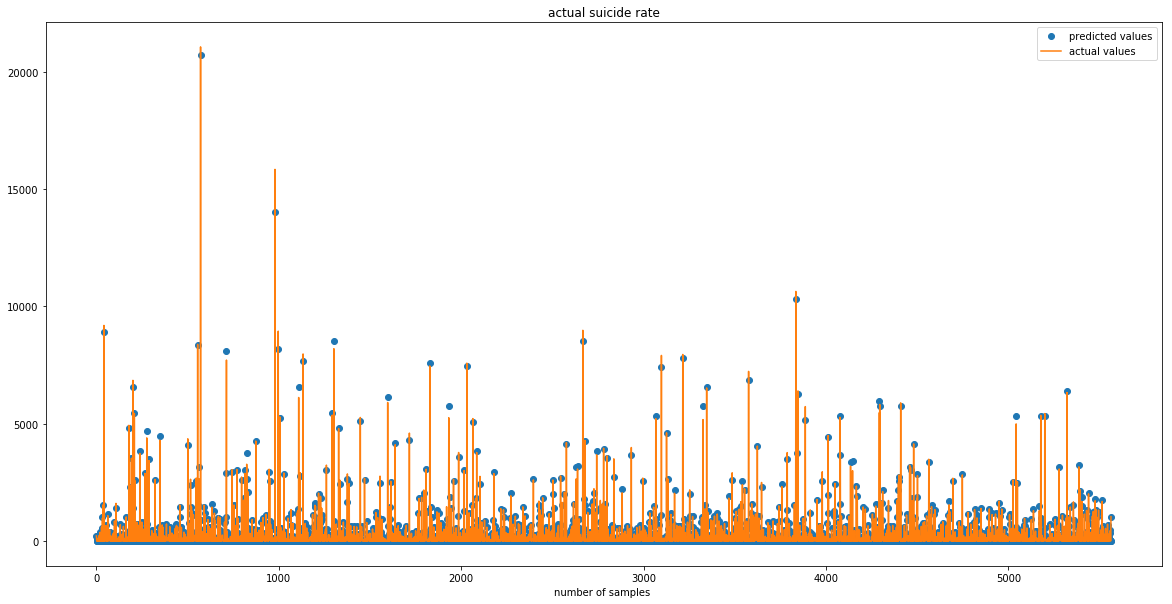

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.figure(figsize = (20,10))
plt.plot(np.arange(len(predict)),predict, 'o', label = "predicted values")
plt.title('predicted and actual suicide rate')
plt.xlabel("number of samples ")
#plt.figure(2)
plt.plot(np.arange(len(predict)),test_y.values, label = "actual values")
plt.legend(loc = 'best')
plt.title('actual suicide rate')

In [ ]:
# mean absolute error 
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(test_y, predict)

9.408878504672897

In [ ]:
# mean absolute percentage error 
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape(test_y, predict)

3.0110918730779384

In [ ]:
originaldata = originaldata[originaldata['country'] == 'United States']

female 5-14 years R^2 Score:  0.3887446766478142


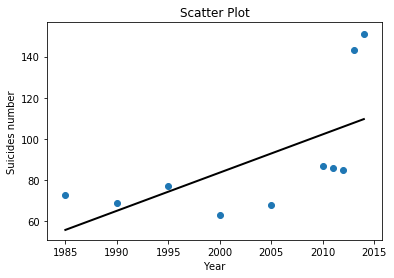

female 15-24 years R^2 Score:  0.33009205940086916


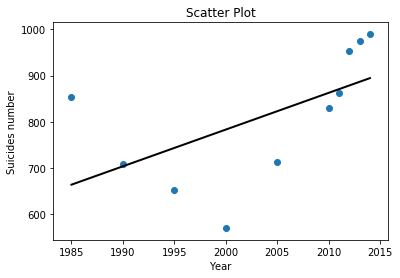

female 25-34 years R^2 Score:  0.04667860204855212


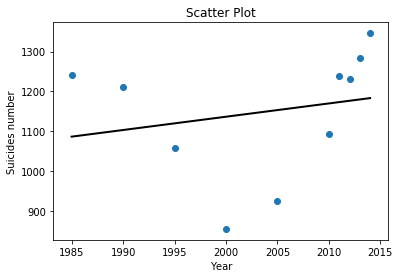

female 35-54 years R^2 Score:  0.9712970974246905


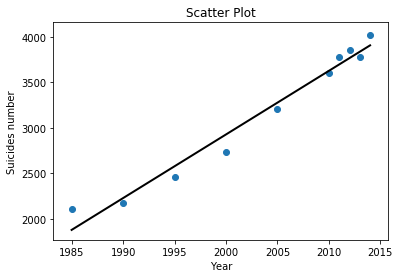

female 55-74 years R^2 Score:  0.550444999798848


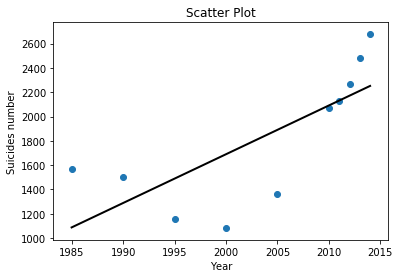

female 75+ years R^2 Score:  0.36480706266473406


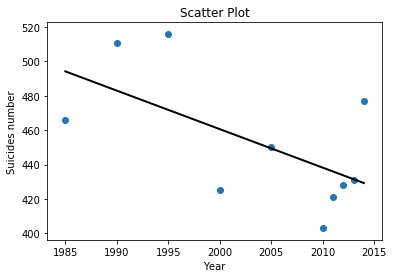

male 5-14 years R^2 Score:  0.06756884455757073


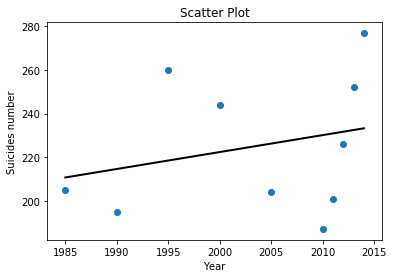

male 15-24 years R^2 Score:  0.12958943994449545


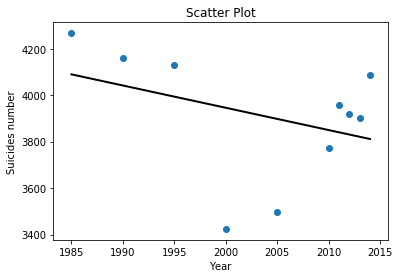

male 25-34 years R^2 Score:  0.024923699909794372


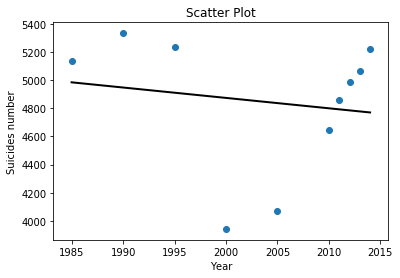

male 35-54 years R^2 Score:  0.973959748311861


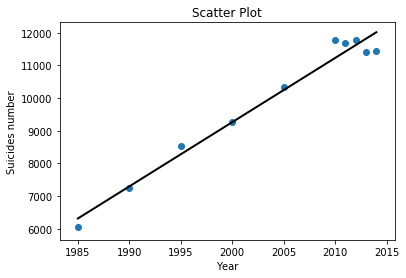

male 55-74 years R^2 Score:  0.6477274960068438


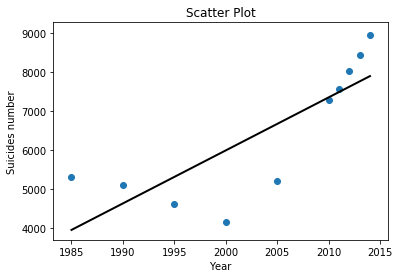

male 75+ years R^2 Score:  0.6582629571190959


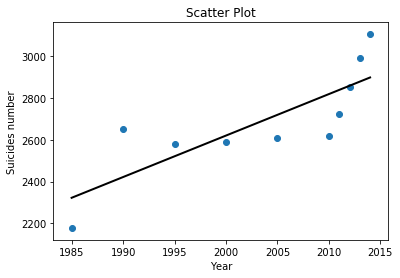

In [ ]:
# Lineer Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)  # Prediction Space
#print(predict_space)
lis = ['female', 'male']
lis2 = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
for i in lis:
    for k in lis2:
        data_1 = originaldata[originaldata['sex'] == i]
        data_sex = data_1[data_1['age'] == k ]
        x_sex = np.array(data_sex.loc[:,'year']).reshape(-1,1)
        y_sex = np.array(data_sex.loc[:,'suicides_no']).reshape(-1,1)
        reg.fit(x_sex,y_sex)                                               # Fit
        predicted = reg.predict(predict_space)                     # Prediction
        print( i, k, 'R^2 Score: ', reg.score(x_sex,y_sex))                       # R^2 calculation
        # print(i)
        #plt.figure(figsize = [9,6])
        #print(i,k)
        plt.plot(predict_space, predicted, color = 'black', linewidth = 2)
        plt.scatter(x_sex,y_sex)
        plt.title('Scatter Plot')
        plt.xlabel('Year')
        plt.ylabel('Suicides number')
        plt.show()